In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re
from wordcloud import WordCloud
from PIL import Image
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [113]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [114]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\공공데이터포털\제주특별자치도_제주도장소(POI)데이터\*')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\제주특별자치도_제주도장소(POI)데이터\\제주특별자치도_제주도장소(POI)데이터_20151231.csv']

In [115]:
df = pd.read_csv(files[0],encoding='cp949')
df.head()

,장소 POI에 대한 ID 구분 번호 체계,위치좌표 X축값,위치좌표 Y축값,구분,장소명,소재지,데이터기준일자
0,3,126.568803,33.236546,교통시설,동방파제,제주특별자치도 서귀포시 서귀동 758-2,2015-12-31
1,4,126.562554,33.235071,지명관련,새섬,제주특별자치도 서귀포시 서귀동 산 3-3,2015-12-31
2,5,126.599675,33.230314,지명관련,섶섬,제주특별자치도 서귀포시 보목동 산 1,2015-12-31
3,6,126.565891,33.226031,지명관련,문섬,제주특별자치도 서귀포시 서귀동 산 4,2015-12-31
4,7,126.516395,33.218414,지명관련,범섬,제주특별자치도 서귀포시 법환동 산 2,2015-12-31


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74439 entries, 0 to 74438
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   장소 POI에 대한 ID 구분 번호 체계   74439 non-null  int64  
 1   위치좌표 X축값                 74439 non-null  float64
 2   위치좌표 Y축값                 74439 non-null  float64
 3   구분                       74439 non-null  object 
 4   장소명                      74439 non-null  object 
 5   소재지                      74439 non-null  object 
 6   데이터기준일자                  74439 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 4.0+ MB


In [117]:
df.describe()

,장소 POI에 대한 ID 구분 번호 체계,위치좌표 X축값,위치좌표 Y축값
count,74439.000000,74439.000000,74439.000000
mean,37748.226951,126.526163,33.419657
std,21972.020369,0.154458,0.110656
min,3.000000,125.182446,32.122956
25%,18764.500000,126.470530,33.304099
50%,37564.000000,126.524476,33.478869
75%,56245.500000,126.570727,33.500017
max,76268.000000,126.969674,33.966161


In [118]:
df.describe(include=np.object)

,구분,장소명,소재지,데이터기준일자
count,74439,74439,74439,74439
unique,20,65772,42316,1
top,쇼핑/편의,노상주차장,제주특별자치도 제주시 아라일동 1,2015-12-31
freq,11606,431,86,74439


In [119]:
df.rename(columns={df.columns[0]:'id',df.columns[1]:'x좌표',df.columns[2]:'y좌표'},inplace=True)

In [120]:
df['x'] = df['x좌표'].apply(lambda x : int((x-125.182446)*50))
df['y'] = df['y좌표'].apply(lambda x : int((x-32.122956)*50))
df['y'] = df['y'].max()-df['y']

## 시각화

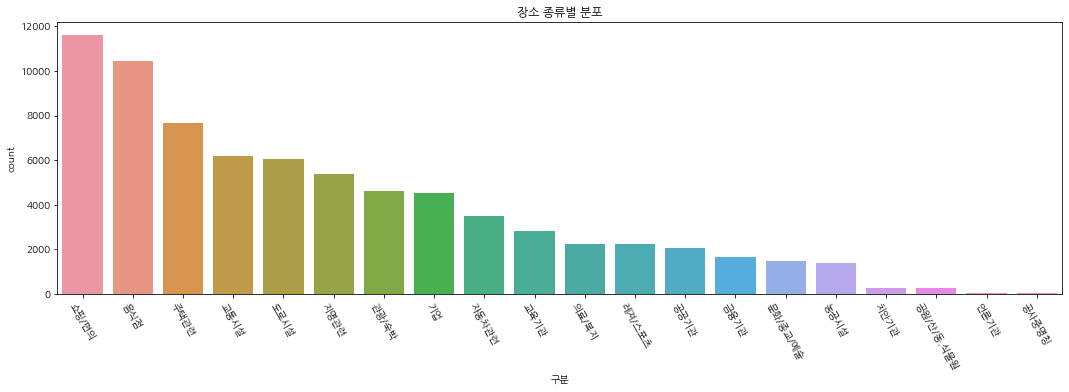

In [136]:
plt.figure(figsize=(18,5))
sub_df = df.groupby('구분',as_index=False)['id'].count().sort_values('id',ascending=False)
area_cols = sub_df['구분'].unique()
sns.barplot(data=sub_df,x='구분',y='id').set(title='장소 종류별 분포',ylabel='count')
g=plt.xticks(rotation=-60)

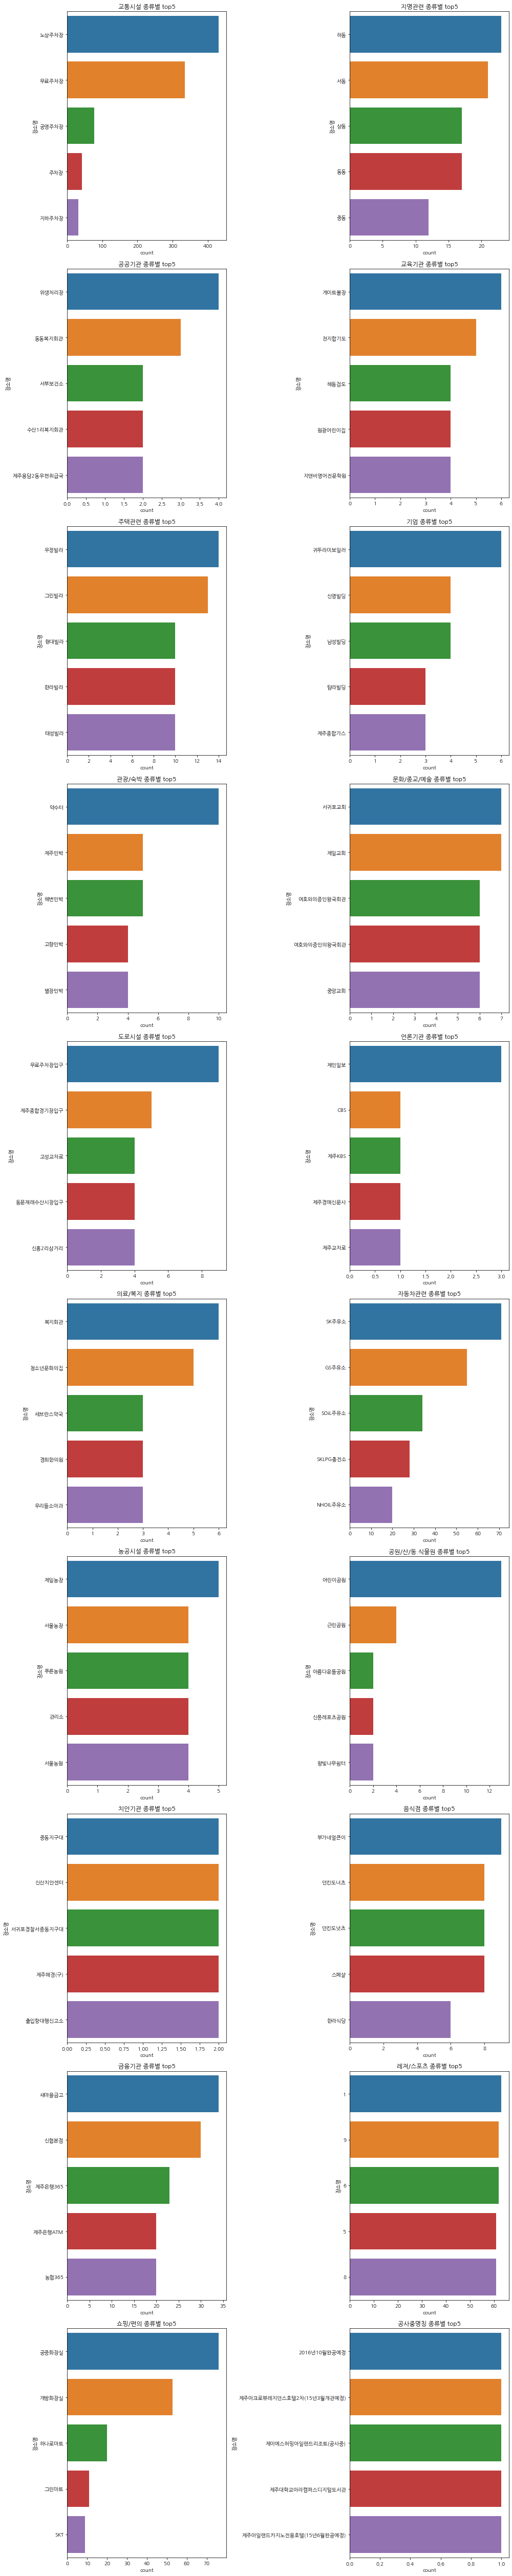

In [144]:
fig,axes = plt.subplots(10,2,figsize=(14,70))
for i,c in enumerate(df['구분'].unique()):
    sub_df = df[df['구분']==c].groupby('장소명',as_index=False)['id'].count().sort_values('id',ascending=False)
    sns.barplot(data=sub_df.head(),x='id',y='장소명',ax=axes[i//2][i%2]).set(title=f'{c} 종류별 top5',xlabel='count')
plt.tight_layout()

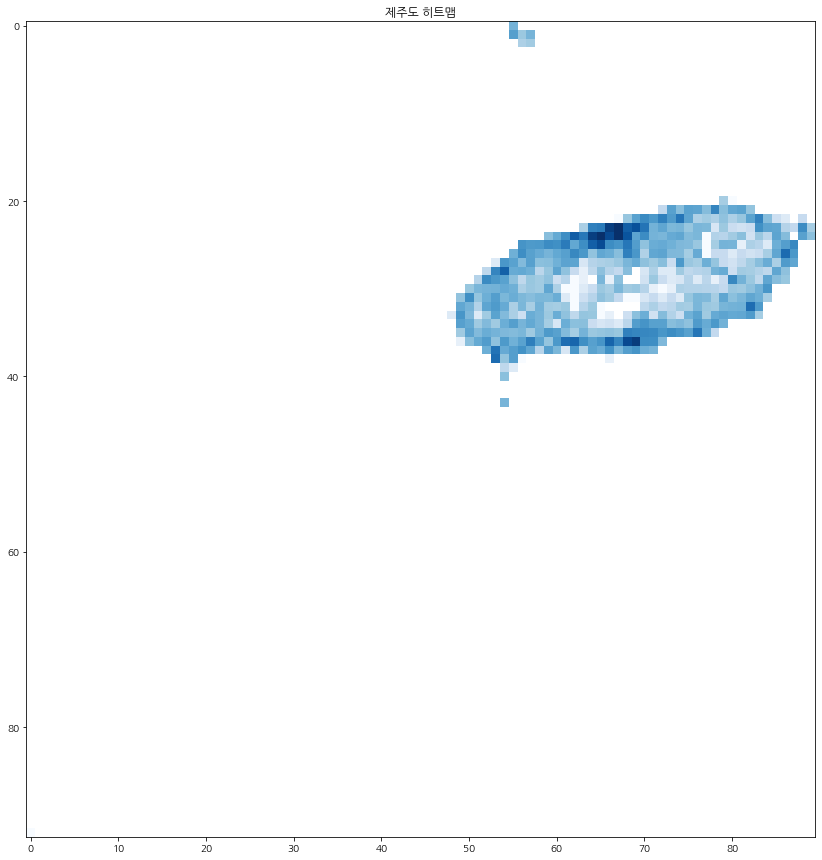

In [130]:
from matplotlib import colormaps as cm
w = df['x'].max()-df['x'].min()+1
h = df['y'].max()-df['y'].min()+1
jeju_map = np.zeros((h,w))
for x,y in zip(df['x'].values,df['y'].values):
    jeju_map[y][x] += 1
plt.figure(figsize=(15,15))
plt.title('제주도 히트맵')
plt.imshow(np.log(jeju_map),cmap = cm['Blues'])
plt.show()

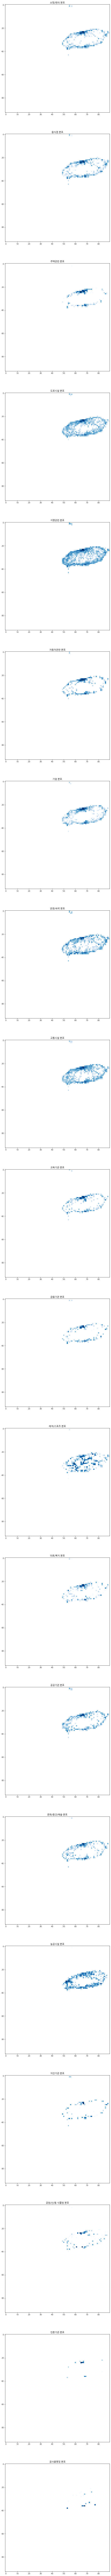

In [128]:
fig,ax = plt.subplots(len(area_cols),1,figsize=(12,12*len(area_cols)))

for i,c in enumerate(area_cols):
    sub_df = df[df['구분']==c]
    jeju_map = np.zeros((h,w))
    for x,y in zip(sub_df['x'].values,sub_df['y'].values):
        jeju_map[y][x] += 1
    ax[i].set_title(f'{c} 분포')
    ax[i].imshow(np.log(jeju_map),cmap = cm['Blues'])